In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
df['target'] = iris.target
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
19,5.1,3.8,1.5,0.3,0
123,6.3,2.7,4.9,1.8,2
27,5.2,3.5,1.5,0.2,0
38,4.4,3.0,1.3,0.2,0
124,6.7,3.3,5.7,2.1,2


In [15]:
df[df.target == 1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [16]:
df[df.target == 2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [17]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [19]:
df[45:55]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
45,4.8,3.0,1.4,0.3,0,setosa
46,5.1,3.8,1.6,0.2,0,setosa
47,4.6,3.2,1.4,0.2,0,setosa
48,5.3,3.7,1.5,0.2,0,setosa
49,5.0,3.3,1.4,0.2,0,setosa
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [20]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

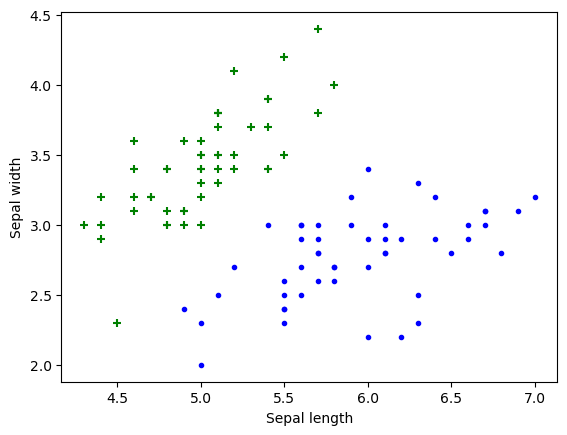

In [22]:
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.scatter(
    df0["sepal length (cm)"], df0["sepal width (cm)"], color="green", marker="+"
)
plt.scatter(
    df1["sepal length (cm)"], df1["sepal width (cm)"], color="blue", marker="."
)

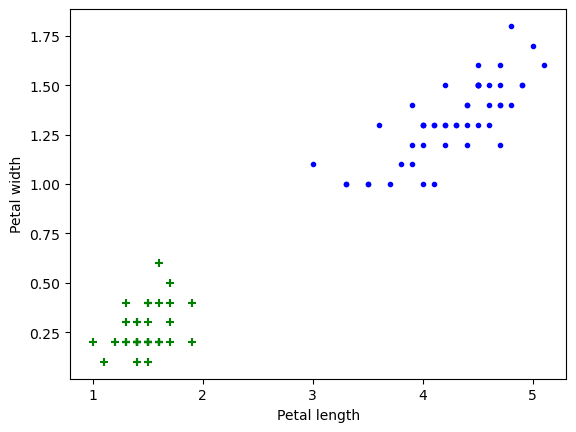

In [23]:
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.scatter(
    df0["petal length (cm)"], df0["petal width (cm)"], color="green", marker="+"
)
plt.scatter(df1["petal length (cm)"], df1["petal width (cm)"], color="blue", marker=".")

In [35]:
X = df.drop(['target','flower_name'],axis = 'columns')
y = df.target
X.head(),y.head(),y.shape

(   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                5.1               3.5                1.4               0.2
 1                4.9               3.0                1.4               0.2
 2                4.7               3.2                1.3               0.2
 3                4.6               3.1                1.5               0.2
 4                5.0               3.6                1.4               0.2,
 0    0
 1    0
 2    0
 3    0
 4    0
 Name: target, dtype: int32,
 (150,))

In [36]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [37]:
X_train.shape,y_train.shape

((120, 4), (120,))

In [38]:
from sklearn.svm import SVC

model = SVC()

model.fit(X_train,y_train)

SVC()

In [39]:
model.score(X_test,y_test)

0.9666666666666667

In [40]:
model.predict([[4.8,3.0,1.5,0.3]])

c:\Users\sunci\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

## PARAMETER TUNING

In [53]:
model_C = SVC(C=1)
model_C.fit(X_train,y_train)
model_C.score(X_test,y_test)

0.9666666666666667

In [46]:
model_g = SVC(gamma=10)
model_g.fit(X_train,y_train)
model_g.score(X_test,y_test)

0.9333333333333333

In [54]:
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(X_train,y_train)
model_linear_kernal.score(X_test,y_test)

1.0